In [14]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.ndimage import zoom

# Imports

In [73]:
skels = np.load("/neurospin/dico/data/deep_folding/current/datasets/ACCpatterns/crops/2mm/CINGULATE/mask/Rskeleton.npy")
subjects = pd.read_csv("/neurospin/dico/data/deep_folding/current/datasets/ACCpatterns/crops/2mm/CINGULATE/mask/Rskeleton_subject.csv")
subjects_labels = pd.read_csv("/neurospin/dico/agaudin/Runs/09_new_repo/Output/grad_cam/16-13-24_111/ACCpatterns_supervised_results/ACC_outputs/full_outputs.csv")

subjects_labels['preds'] = np.where(subjects_labels.dim1 < subjects_labels.dim2, 1, 0) 

print(skels.shape, subjects.shape, subjects_labels.shape)
print(subjects.head())
print("Global accuracy", np.mean(subjects_labels.labels == subjects_labels.preds))
subjects_labels

(341, 17, 40, 38, 1) (341, 1) (341, 5)
        Subject
0  1-03HUBJO_t0
1  1-08ANDTI_t0
2  1-11LEBJO_t0
3  1-15LEHMI_t0
4  1-17COLMA_t0
Global accuracy 0.906158357771261


,ID,labels,dim1,dim2,preds
0,1-11LEBJO_t0,1,0.952729,1.743722,1
1,1-15LEHMI_t0,0,3.741243,0.646505,0
2,1-17COLMA_t0,0,4.427067,-0.006810,0
3,1-18ROUCO_t0,0,4.614058,-0.007430,0
4,1-20FORHU_t0,0,3.501430,-0.001544,0
...,...,...,...,...,...
336,sub-inhibition10_ses-pretraining_T1w,0,2.401234,-0.004864,0
337,sub-inhibition14_ses-pretraining_T1w,1,3.275207,-0.007702,0
338,sub-inhibition23_ses-pretraining_T1w,0,4.103655,-0.003292,0
339,sub-inhibition28_ses-pretraining_T1w,0,2.123475,0.657446,0


In [140]:
# binarize skels
print(np.unique(skels))
skels = np.where(skels >= 1, 1, 0)
print(np.unique(skels), skels.shape)

[  0  30  60 100 110 120]
[0 1] (341, 17, 40, 38, 1)


In [74]:
test_pickle_path = "/neurospin/dico/agaudin/Runs/09_new_repo/Output/grad_cam/16-13-24_111/ACCpatterns_supervised_results/attributions.pkl"

with open(test_pickle_path, 'rb') as file:
    grads_final = pickle.load(file)

grads_final

{'train': {'0': {'1-11LEBJO_t0': array([[[[0.00030622, 0.02245484, 0.03486762, 0.00078908],
            [0.01429663, 0.03816801, 0.01000583, 0.01422376],
            [0.        , 0.03541876, 0.01127667, 0.00298111],
            [0.02591966, 0.01359609, 0.02646831, 0.00550766],
            [0.00766558, 0.00182688, 0.        , 0.00110156]],
   
           [[0.00331601, 0.00120778, 0.03644798, 0.01384725],
            [0.0069813 , 0.04267865, 0.02062993, 0.01720768],
            [0.01362748, 0.00022   , 0.03084815, 0.00073754],
            [0.01303998, 0.02320953, 0.01525342, 0.00755182],
            [0.00142915, 0.0200637 , 0.        , 0.        ]]]],
         dtype=float32),
   '1-15LEHMI_t0': array([[[[0.0000000e+00, 0.0000000e+00, 7.3967203e-03, 2.7477510e-02],
            [0.0000000e+00, 1.7220899e-02, 5.2373346e-02, 3.2195836e-02],
            [0.0000000e+00, 3.8685702e-02, 1.7835921e-02, 0.0000000e+00],
            [1.2519304e-03, 4.8760198e-02, 1.8697605e-02, 6.9984002e-05],
     

In [75]:
print(grads_final.keys())

print(grads_final['train'].keys())  # 0 and 1 are the classes

print(len(grads_final['train']['0'].keys()))

print(grads_final['train']['0']['1-11LEBJO_t0'].shape)
print(grads_final['train']['1']['1-11LEBJO_t0'].shape)

print(grads_final['train']['0']['1-11LEBJO_t0'])
print('')
print(grads_final['train']['1']['1-11LEBJO_t0'])

dict_keys(['train', 'val', 'test'])
dict_keys(['0', '1'])
246
(1, 2, 5, 4)
(1, 2, 5, 4)
[[[[0.00030622 0.02245484 0.03486762 0.00078908]
   [0.01429663 0.03816801 0.01000583 0.01422376]
   [0.         0.03541876 0.01127667 0.00298111]
   [0.02591966 0.01359609 0.02646831 0.00550766]
   [0.00766558 0.00182688 0.         0.00110156]]

  [[0.00331601 0.00120778 0.03644798 0.01384725]
   [0.0069813  0.04267865 0.02062993 0.01720768]
   [0.01362748 0.00022    0.03084815 0.00073754]
   [0.01303998 0.02320953 0.01525342 0.00755182]
   [0.00142915 0.0200637  0.         0.        ]]]]

[[[[0.         0.         0.         0.        ]
   [0.         0.         0.         0.        ]
   [0.         0.         0.00103853 0.        ]
   [0.         0.         0.         0.        ]
   [0.         0.         0.         0.        ]]

  [[0.         0.         0.         0.        ]
   [0.         0.         0.         0.        ]
   [0.         0.         0.         0.        ]
   [0.         0.     

# Individual subject display

Chosen subject: a0010_t1_s03
Corresponding index: 28
(17, 40, 38)
True label 0
Predicted label 0


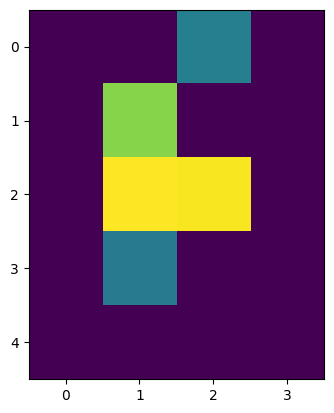

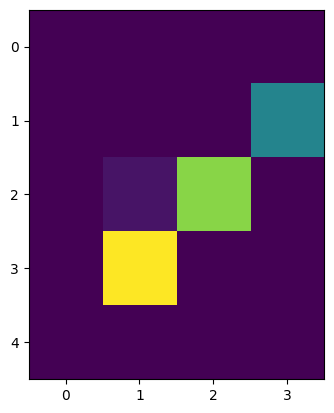

In [78]:
sub_name = np.random.choice(list(grads['train']['0'].keys()))
print("Chosen subject:", sub_name)

idx = subjects[subjects.Subject == sub_name].index[0]
print("Corresponding index:", idx)
skel_sub = skels[idx, ..., 0]
print(skel_sub.shape)

sub_label = str(subjects_labels[subjects_labels.ID == sub_name].labels.values[0])
print("True label", sub_label)
sub_pred = str(subjects_labels[subjects_labels.ID == sub_name].preds.values[0])
print("Predicted label", sub_pred)

grads_ind = grads_final['train'][sub_label][sub_name][0]

plt.imshow(grads_ind[0])
plt.figure()
plt.imshow(grads_ind[1])

(2, 5, 4) (341, 17, 40, 38, 1)


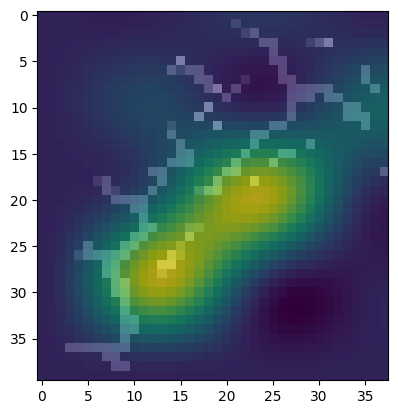

In [79]:
print(grads_ind.shape, skels.shape)
resize_ratio = np.divide(skels.shape[1:-1], grads_ind.shape)

upsampled_grads_ind = zoom(grads_ind, zoom=resize_ratio)
plt.imshow(skel_sub[10,:,], cmap='gray')
plt.imshow(upsampled_grads_ind[10], alpha=0.7)

In [179]:
def grad_cam_sub(sub_name):
    print("Chosen subject:", sub_name)
    idx = subjects[subjects.Subject == sub_name].index[0]
    print("Corresponding index:", idx)
    # get the skeleton of the subject
    skel_sub = skels[idx, ..., 0]

    # get its true and predited labels
    sub_label = str(subjects_labels[subjects_labels.ID == sub_name].labels.values[0])
    print("True label:", sub_label)
    pred_label = str(subjects_labels[subjects_labels.ID == sub_name].preds.values[0])
    print("Predicted label:", pred_label)

    # get the grad map and resample it to the skel size
    grads_ind = grads['train'][pred_label][sub_name][0]
    resize_ratio = np.divide(skels.shape[1:-1], grads_ind.shape)
    upsampled_grads_ind = zoom(grads_ind, zoom=resize_ratio)

    plt.figure(figsize=(26,8))
    for i in range(skel_sub.shape[0]):
        plt.subplot(2,9,i+1)
        plt.imshow(skel_sub[i,:,], cmap='gray')
        plt.imshow(upsampled_grads_ind[i], alpha=0.7)

Chosen subject: sub-active21_ses-pretraining_T1w
Corresponding index: 313
True label: 0
Predicted label: 0


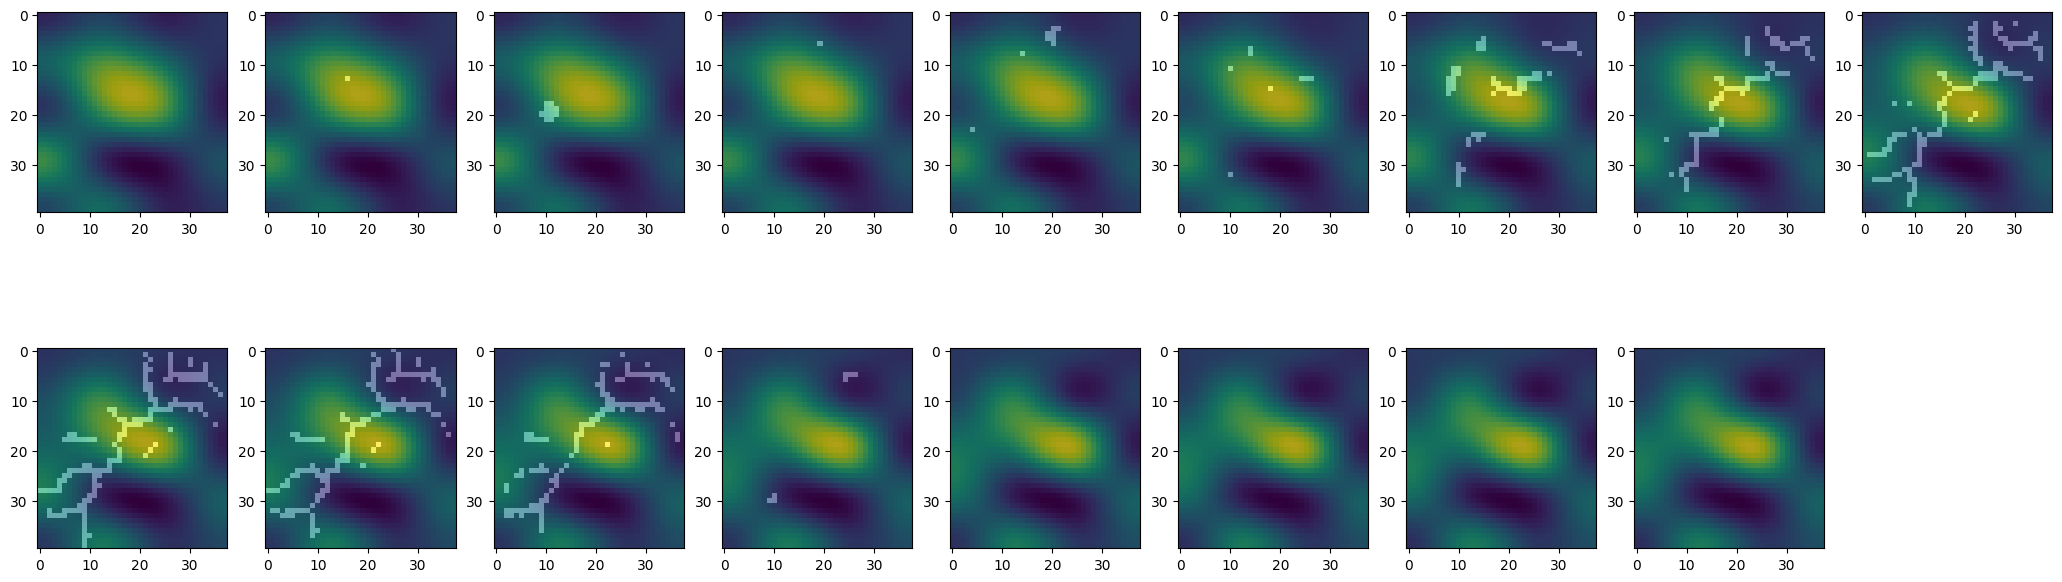

In [183]:
sub_name = np.random.choice(list(grads['train']['0'].keys()))
grad_cam_sub(sub_name)

# Aggregated display

In [162]:
def compute_aggregated_skel(skels, threshold):
    """Compute the mean of skels voxel by voxel, then keep only the most represented voxels,
    i.e. the (1-threshold)*100 % with highest occurence."""
    mean_skel = np.squeeze(np.mean(skels, axis=0))

    # keep only the most represented voxels and binarize
    max_vox = np.max(mean_skel)
    agg_skel = np.where(mean_skel > max_vox*(1-threshold), 1, 0)

    return agg_skel

In [165]:
def display_aggregated(gradients, skeletons, subjects, list_subjects, 
                       common_label, threshold, test_intra=False):
    """Arguments:
        - gradients: dictionary saved during supervised_pipeline containing the gradients map
        of each subject
        - skeletons: a skeleton matrix containing at least all the subjects' skeletons
        - subjects: a csv giving the indices corresponding to the subjects' names
        - list_subjects: the list of subjects to visualize together
        - common_label: the predicted label of the subjects. They must all share the same.
        common_label is used to choose which gradient maps to display.
        - threshold used when aggregating skeletons for final view.
        - test_intra: True if test_intra is used for the chosen dataset."""
    
    # select the targeted subjects
    sub_idx = list(subjects[subjects.Subject.isin(list_subjects)].index)
    sub_skels = skels[sub_idx]

    # reorganizing the grads
    target_class_grads = {}
    subsets = ['train', 'val', 'test']
    if test_intra:
        subsets.append('test_intra')
    for subset in subsets:
        target_class_grads.update(gradients[subset][common_label])
    grads = [target_class_grads[sub] for sub in list_subjects]

    # compute the mean of all the gradients and display it
    mean_grads = np.squeeze(np.mean(grads, axis=0))
    plt.figure()
    plt.subplot(1,2,1)
    plt.imshow(mean_grads[0])
    plt.subplot(1,2,2)
    plt.imshow(mean_grads[1])
    plt.show()

    # compute the aggregated skeleton
    agg_skel = compute_aggregated_skel(sub_skels, threshold)

    # upsample the gradient to match the skeleton size
    resize_ratio = np.divide(agg_skel.shape, mean_grads.shape)
    upsampled_grads = zoom(mean_grads, zoom=resize_ratio)

    # display all the slices along the first axis
    plt.figure(figsize=(26,8))
    for i in range(agg_skel.shape[0]):
        plt.subplot(2,9,i+1)
        plt.imshow(agg_skel[i,:,], cmap='gray')
        plt.imshow(upsampled_grads[i], alpha=0.7)
    plt.show()

In [ ]:
# get the IDs of True Positives and True Negatives
TP = subjects_labels[(subjects_labels.labels == 1) & (subjects_labels.preds == 1)].ID.values
TN = subjects_labels[(subjects_labels.labels == 0) & (subjects_labels.preds == 0)].ID.values

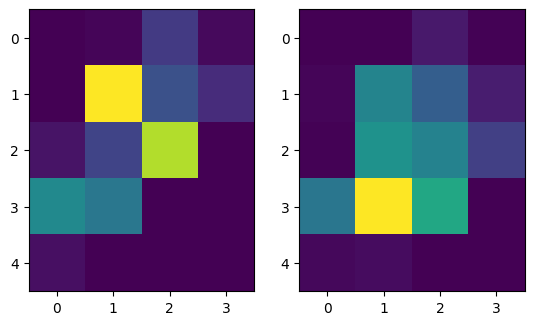

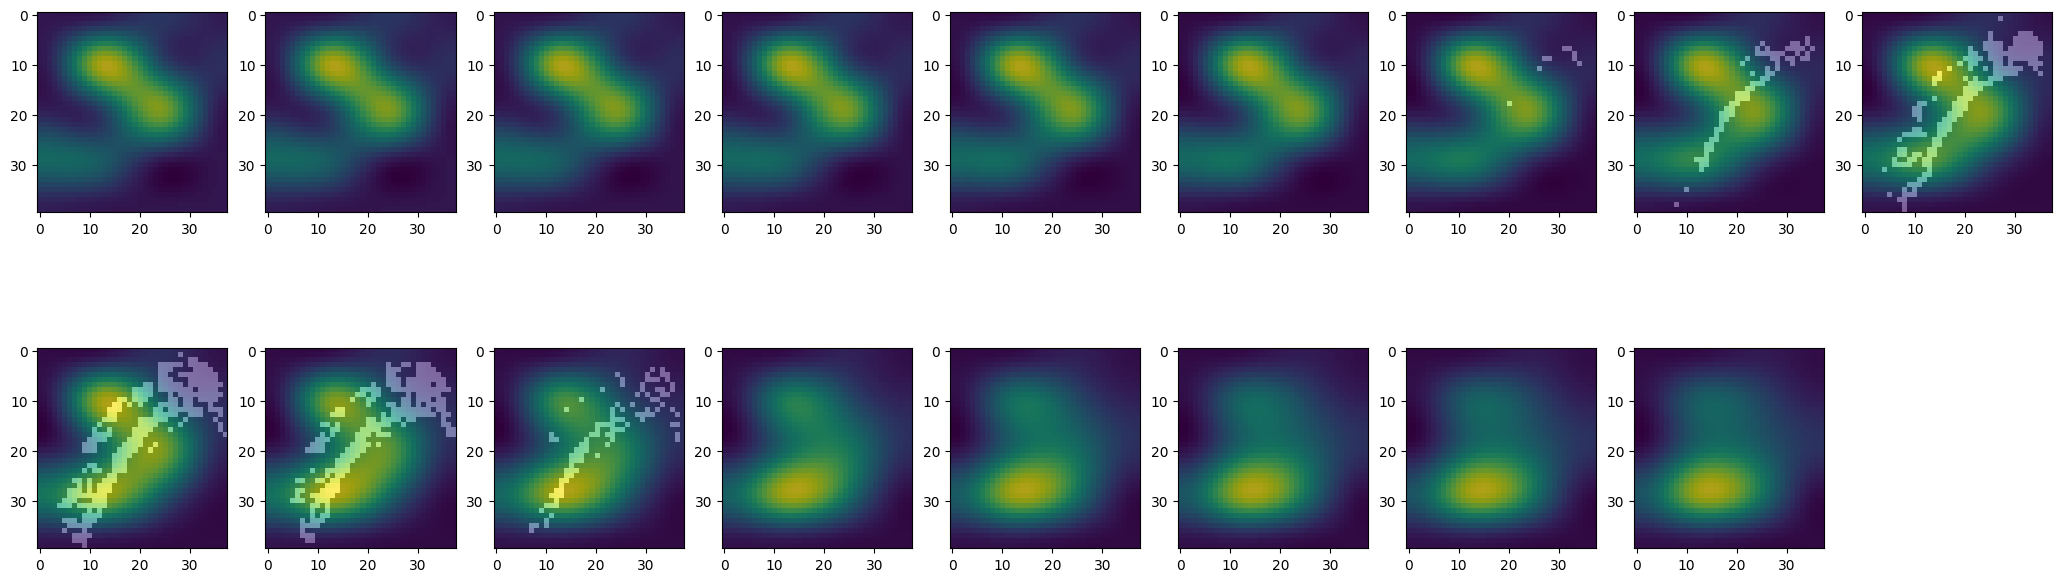

In [166]:
# display True positives
display_aggregated(grads_final, skels, subjects, TP,
                   '1', 0.4)

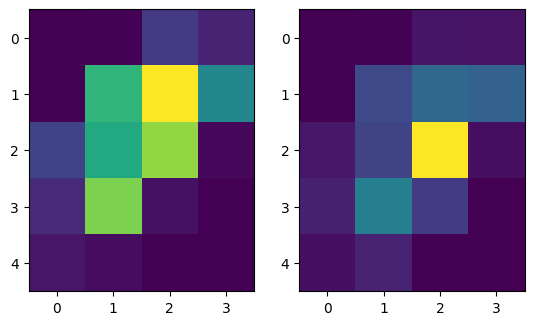

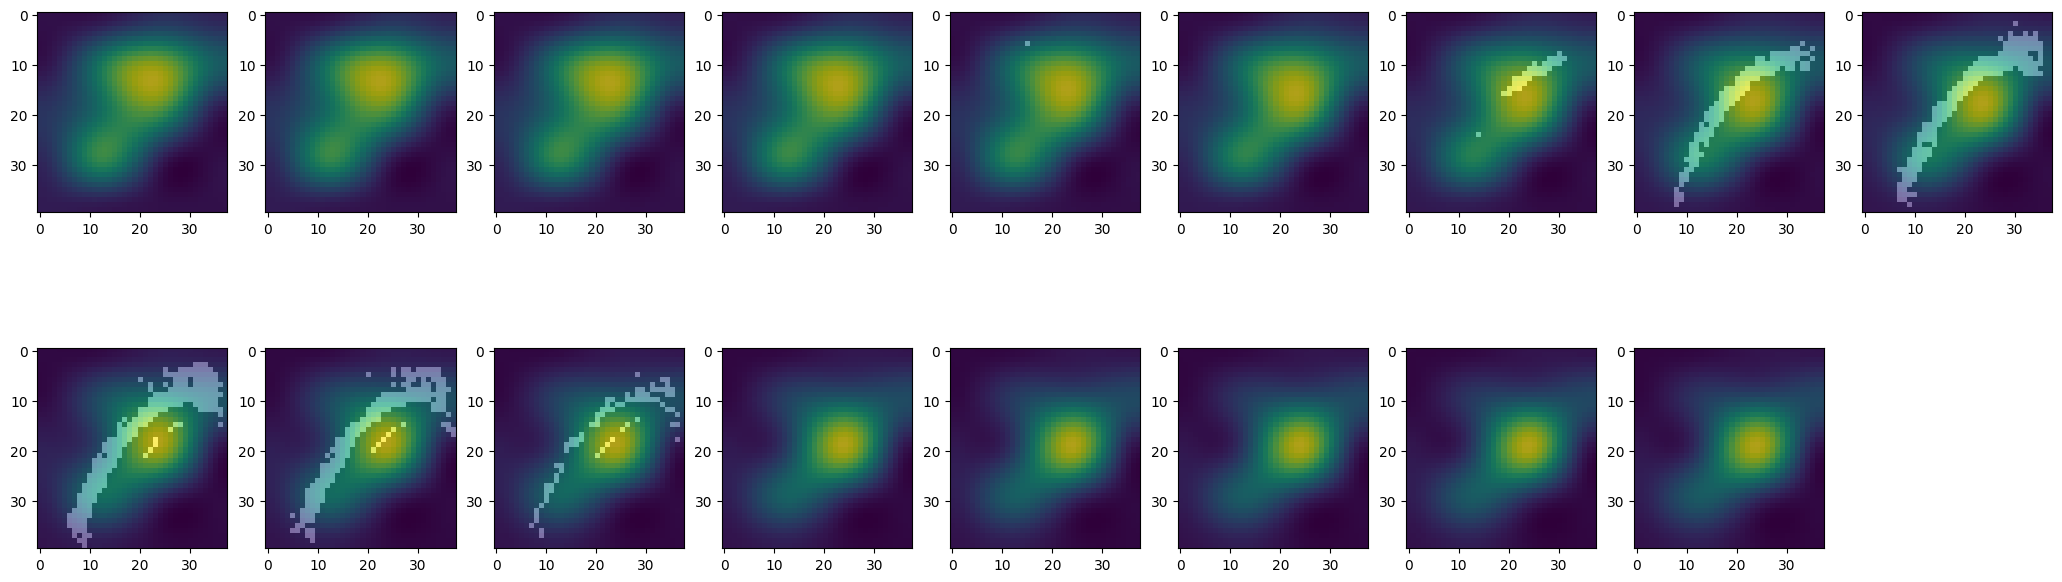

In [167]:
# display True Negatives
display_aggregated(grads_final, skels, subjects, TN,
                   '0', 0.4)

15


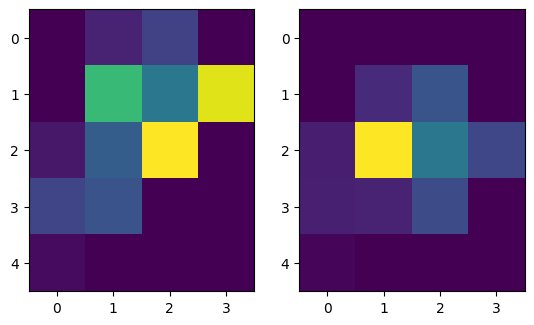

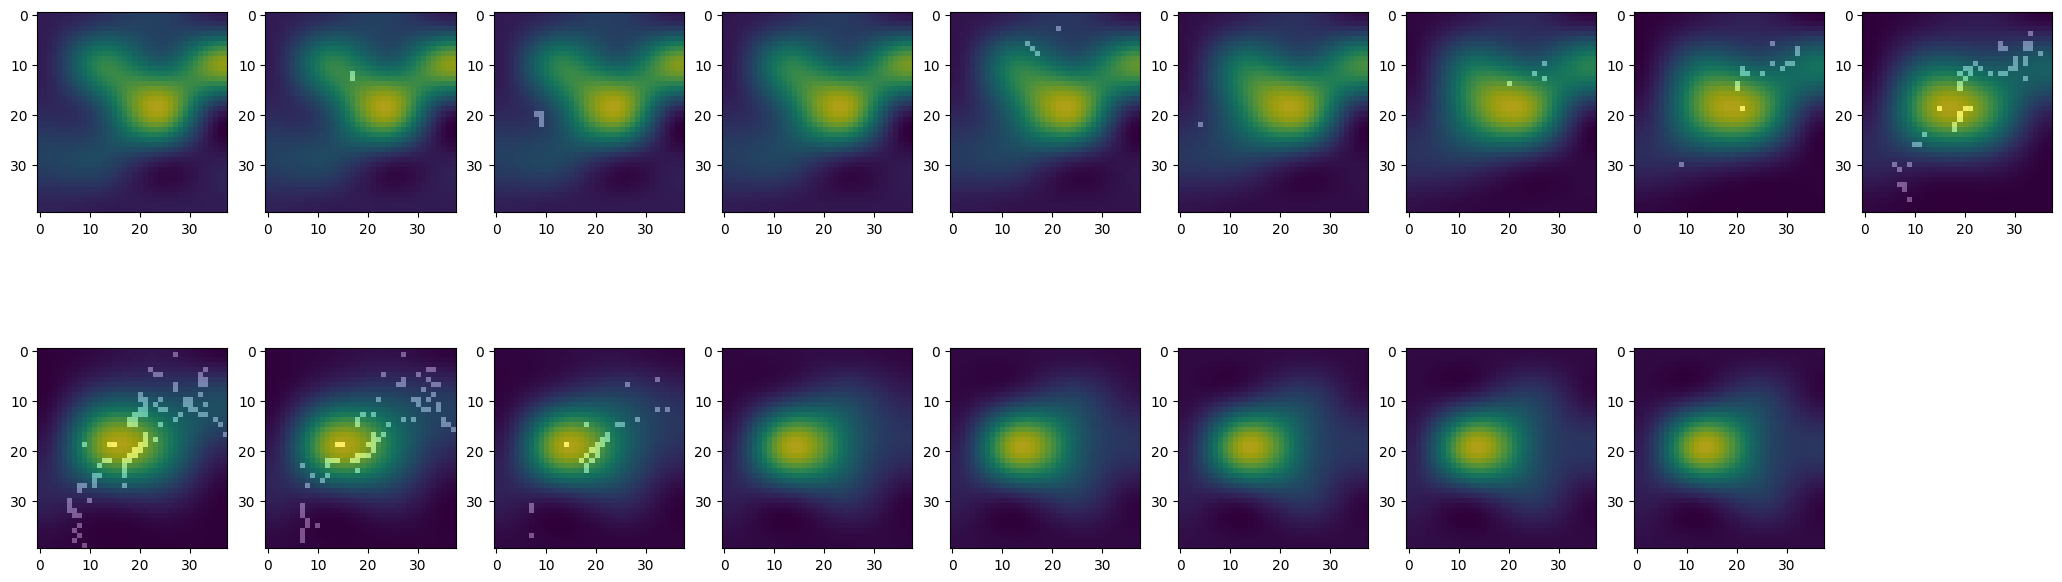

In [170]:
FP = subjects_labels[(subjects_labels.labels == 0) & (subjects_labels.preds == 1)].ID.values
print(len(FP))
display_aggregated(grads_final, skels, subjects, FP,
                   '1', 0.5)

17


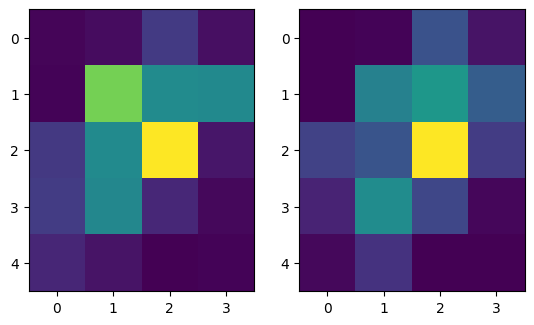

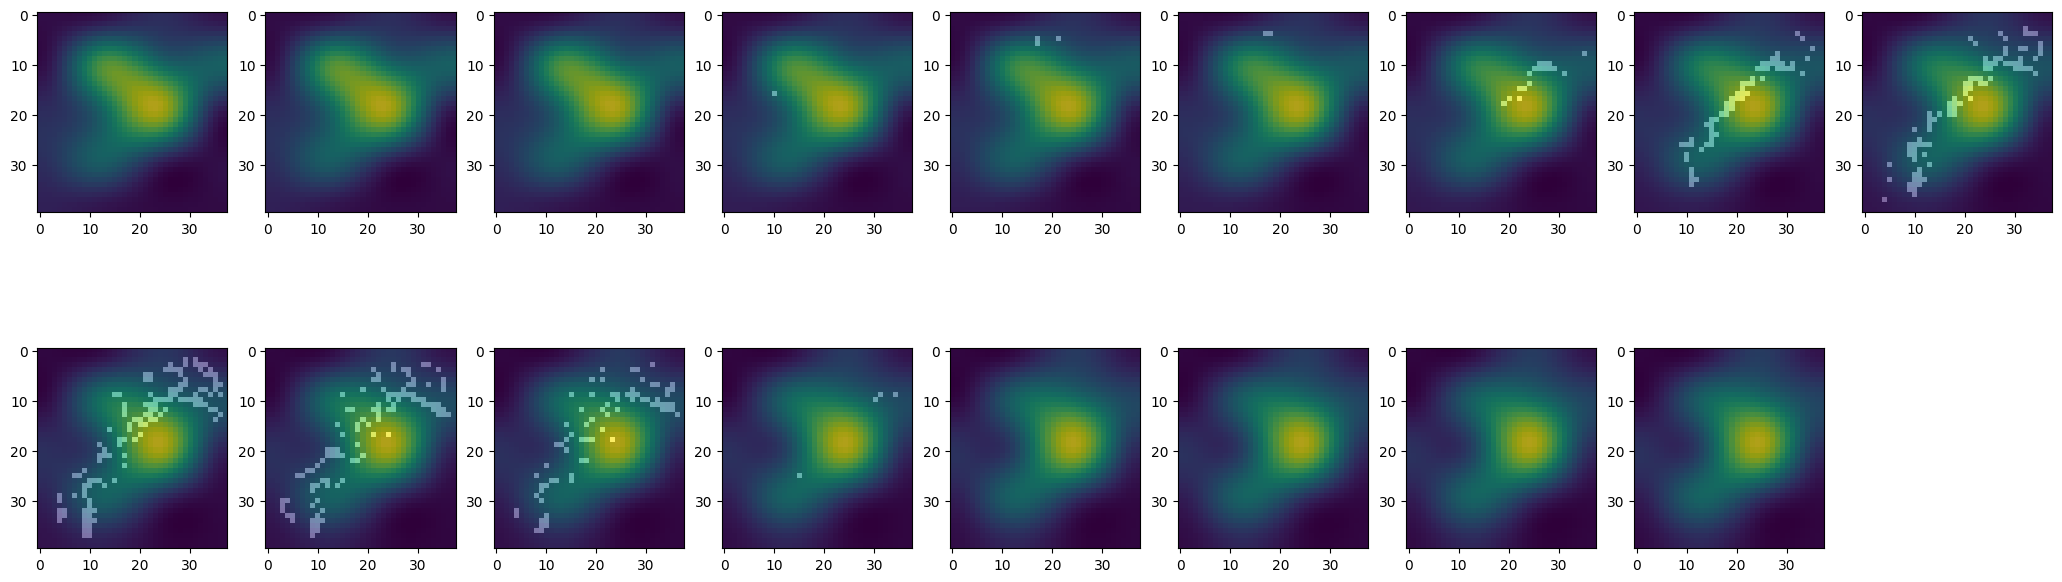

In [172]:
FN = subjects_labels[(subjects_labels.labels == 1) & (subjects_labels.preds == 0)].ID.values
print(len(FN))
display_aggregated(grads_final, skels, subjects, FN,
                   '0', 0.5)